# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
from IPython.core.magic import record_magic
from mypy.semanal import names_modified_by_assignment
from prompt_toolkit.key_binding.bindings.named_commands import end_of_file
from statsmodels.graphics.tukeyplot import results

print("Hello World!")


Hello World!


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("f4k25g/nfl-salaries")

print("Path to dataset files:", path)

C:\Users\efrui\PyCharmMiscProject\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\efrui\.cache\kagglehub\datasets\f4k25g\nfl-salaries\versions\1


In [11]:
import pandas as pd
df_nfl_salaries = pd.read_csv(r'C:\Users\efrui\.cache\kagglehub\datasets\f4k25g\nfl-salaries\versions\1\2014-thru-2020-cap-tables.csv')

# https://www.kaggle.com/datasets/f4k25g/nfl-salaries


In [12]:
print(df_nfl_salaries)

                 name  pos   cap_hit  cap_percent  season  \
0      Russell Wilson   QB  31000000        15.53    2020   
1       Aaron Rodgers   QB  29672000        15.06    2019   
2        Kirk Cousins   QB  29000000        15.12    2019   
3          Jared Goff   QB  28842682        14.15    2020   
4         Khalil Mack  OLB  26600000        12.52    2020   
...               ...  ...       ...          ...     ...   
12129  Marcus Sherels   CB         0         0.00    2019   
12130  Deone Bucannon  ILB         0         0.00    2020   
12131    Earl Watford    G         0         0.00    2020   
12132   Tyrunn Walker   DT         0         0.00    2018   
12133        Ben Tate   RB         0         0.00    2014   

                       team  
0          seattle-seahawks  
1         green-bay-packers  
2         minnesota-vikings  
3          los-angeles-rams  
4             chicago-bears  
...                     ...  
12129        miami-dolphins  
12130  tampa-bay-buccaneers

In [13]:
team_name_mapping_salary = {
'oakland-raiders':  'las-vegas-raiders'
,'san-diego-chargers':  'los-angeles-chargers'
,'st.-louis-rams':  'los-angeles-rams'
,'washington-redskins':  'washington-commanders'
,'washington-football-team':    'washington-commanders'
}

In [14]:
# Mapping team names to most recent team name in order to be able to compare historical data with most recent data (in graphs, etc.)

df_nfl_salaries['team']=df_nfl_salaries['team'].replace(team_name_mapping_salary)

In [15]:
df_nfl_salaries['team'].unique()

array(['seattle-seahawks', 'green-bay-packers', 'minnesota-vikings',
       'los-angeles-rams', 'chicago-bears', 'detroit-lions',
       'denver-broncos', 'tampa-bay-buccaneers', 'indianapolis-colts',
       'las-vegas-raiders', 'baltimore-ravens', 'new-york-giants',
       'new-orleans-saints', 'pittsburgh-steelers',
       'washington-commanders', 'atlanta-falcons', 'los-angeles-chargers',
       'tennessee-titans', 'kansas-city-chiefs', 'new-england-patriots',
       'carolina-panthers', 'dallas-cowboys', 'san-francisco-49ers',
       'buffalo-bills', 'miami-dolphins', 'philadelphia-eagles',
       'arizona-cardinals', 'cincinnati-bengals', 'new-york-jets',
       'houston-texans', 'jacksonville-jaguars', 'cleveland-browns'],
      dtype=object)

In [ ]:
group by team and year, calculate gini coefficient


In [16]:
import numpy as np

#define function to calculate Gini coefficient
def gini_calculation(x):
    """
    Calculate the Gini coefficient of a numpy array.
    Based on the bottom equation from:
    http://www.statsdirect.com/help/content/image/stat0206_wmf.gif
    from:
    http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm
    """
    # Force array dtype to double precision for calculations
    x = np.array(x, dtype=np.double)
    # Flatten the array and sort the values in ascending order
    x = np.sort(x.flatten())
    if x.size == 0:
        return 0
    # The Gini coefficient is undefined if the sum is zero
    if np.sum(x) == 0:
      return 0

    n = x.size
    # Calculate the Gini coefficient using the simplified formula for sorted positive values
    # G = (sum(i * xi) for i in 1 to n) / (n * sum(xi)) - (n+1) / (2n)
    # A more common and direct formula:
    # G = (2 * sum(i * xi) - (n + 1) * sum(xi)) / (n * sum(xi))
    # Or, using a mean absolute difference approach:
    # G = 0.5 * rmad (relative mean absolute difference)

    # Efficient numpy implementation:
    index = np.arange(1, n + 1)
    return (2 * np.sum(index * x) - (n + 1) * np.sum(x)) / (n * np.sum(x))

In [17]:
df_bears = df_nfl_salaries[df_nfl_salaries['team']=='chicago-bears']

In [18]:
print(df_bears)

                 name  pos   cap_hit  cap_percent  season           team
4         Khalil Mack  OLB  26600000        12.52    2020  chicago-bears
80         Jay Cutler   QB  18500000        13.91    2014  chicago-bears
91        Kyle Fuller   CB  18000000         9.24    2019  chicago-bears
125        Jay Cutler   QB  16500000        11.37    2015  chicago-bears
133    Allen Robinson   WR  16000000         8.21    2019  chicago-bears
...               ...  ...       ...          ...     ...            ...
11847  DeVante Bausby   CB     51176         0.04    2015  chicago-bears
11906    Greg Scruggs   DE     38823         0.03    2015  chicago-bears
11962     Austen Lane   DE     33529         0.03    2014  chicago-bears
11983    Josh Shirley  OLB     30882         0.02    2016  chicago-bears
12094  Terry Williams   DT     25588         0.02    2015  chicago-bears

[383 rows x 6 columns]


In [19]:
print(df_bears[df_bears['season']==2020])

                         name  pos   cap_hit  cap_percent  season  \
4                 Khalil Mack  OLB  26600000        12.52    2020   
178            Allen Robinson   WR  15000000         7.06    2020   
341               Akiem Hicks   DT  11800000         5.55    2020   
363               Kyle Fuller   CB  11500000         5.41    2020   
482              Charles Leno   LT  10294000         4.84    2020   
597         Mitchell Trubisky   QB   9327591         4.39    2020   
1103               Nick Foles   QB   6666666         3.14    2020   
1241             Robert Quinn  OLB   6100000         2.87    2020   
1252            Buster Skrine   CB   6037500         2.84    2020   
1267             Jimmy Graham   TE   6000000         2.82    2020   
1360    Cordarrelle Patterson   WR   5750000         2.71    2020   
1530             Roquan Smith  ILB   5129227         2.41    2020   
1899           Cody Whitehair    C   4200000         1.98    2020   
1913          Danny Trevathan  ILB

In [20]:
gini_calculation(df_bears['cap_percent'])

np.float64(0.632400751864922)

In [21]:
# Team Stats

# Download latest version
path = kagglehub.dataset_download("nickcantalupa/nfl-team-data-2003-2023")

print("Path to dataset files:", path)


# https://www.kaggle.com/datasets/nickcantalupa/nfl-team-data-2003-2023


# About Dataset
#
# Context
#
# I was interested in analyzing how NFL offenses have evolved over the modern era. I used www.pro-football-reference.com to find the data that I was interested in analyzing. I used Python BeautifulSoup4 and a selenium Webdriver to pull the html data from the website and load it into a DataFrame for analysis.
#
# Content
#
# There is currently data on 672 Teams across 21 seasons. The stats included are regarding team record, passing, rushing, penalties, turnovers, and more. The file team_stats_2003_2023.csv contains 35 variables outlined below.
#



NameError: name 'kagglehub' is not defined

In [22]:
df_team_stats = pd.read_csv(r'C:\Users\efrui\.cache\kagglehub\datasets\nickcantalupa\nfl-team-data-2003-2023\versions\1\team_stats_2003_2023.csv')

In [23]:
print(df_team_stats)
df_team_stats_2020 = df_team_stats[df_team_stats['year']<2021]
# print(df_team_stats_2020)

     year                  team  wins  losses  win_loss_perc  points  \
0    2003  New England Patriots    14       2          0.875     348   
1    2003        Miami Dolphins    10       6          0.625     311   
2    2003         Buffalo Bills     6      10          0.375     243   
3    2003         New York Jets     6      10          0.375     283   
4    2003      Baltimore Ravens    10       6          0.625     391   
..    ...                   ...   ...     ...            ...     ...   
667  2023     Carolina Panthers     2      15          0.118     236   
668  2023   San Francisco 49ers    12       5          0.706     491   
669  2023      Los Angeles Rams    10       7          0.588     404   
670  2023      Seattle Seahawks     9       8          0.529     364   
671  2023     Arizona Cardinals     4      13          0.235     330   

     points_opp  points_diff   mov   g  ...  rush_td  rush_yds_per_att  \
0           238          110   6.9  16  ...        9         

Text(0.5, 1.0, 'Q-Q Plot')

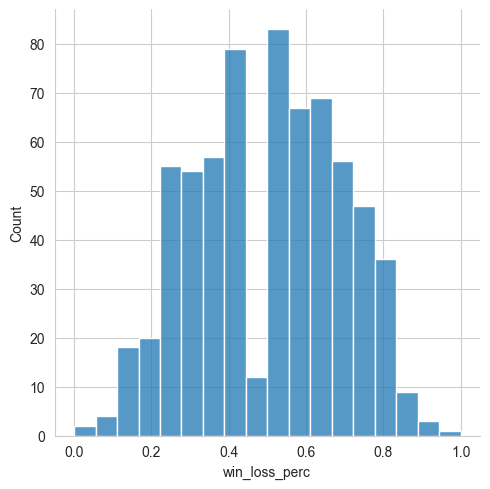

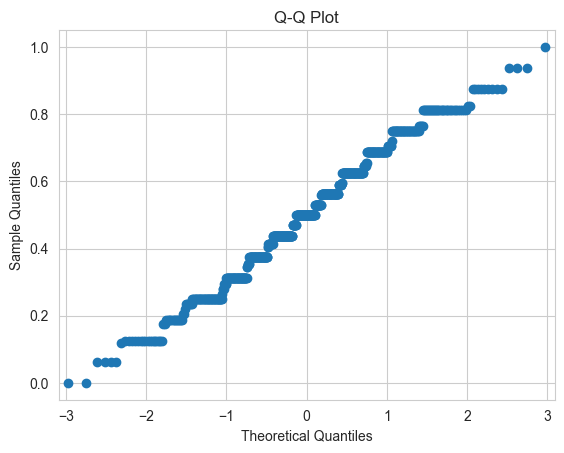

In [24]:
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

sns.displot(df_team_stats['win_loss_perc'])

sm.qqplot(df_team_stats['win_loss_perc'])
plt.title('Q-Q Plot')

Text(0.5, 1.0, 'Q-Q Plot')

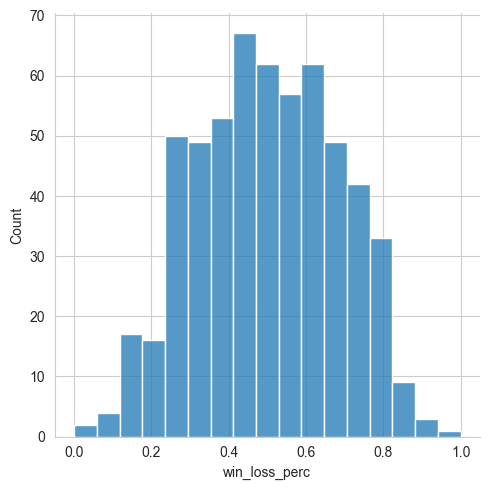

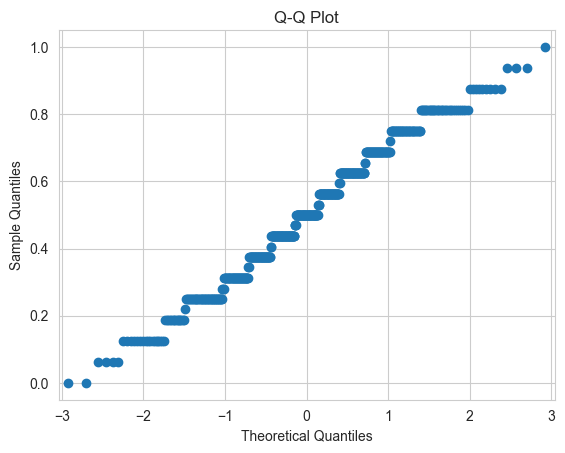

In [25]:
# Data up to and before 2020, when NFL switched to 17 game season

sns.displot(df_team_stats_2020['win_loss_perc'])

sm.qqplot(df_team_stats_2020['win_loss_perc'])
plt.title('Q-Q Plot')

In [26]:
print(df_team_stats.isna().sum())
print(df_nfl_salaries.isna().sum())

year                      0
team                      0
wins                      0
losses                    0
win_loss_perc             0
points                    0
points_opp                0
points_diff               0
mov                     320
g                         0
total_yards               0
plays_offense             0
yds_per_play_offense      0
turnovers                 0
fumbles_lost              0
first_down                0
pass_cmp                  0
pass_att                  0
pass_yds                  0
pass_td                   0
pass_int                  0
pass_net_yds_per_att      0
pass_fd                   0
rush_att                  0
rush_yds                  0
rush_td                   0
rush_yds_per_att          0
rush_fd                   0
penalties                 0
penalties_yds             0
pen_fd                    0
score_pct                 0
turnover_pct              0
exp_pts_tot               0
ties                    352
dtype: int64
name   

In [27]:
import scipy.stats as stats

# shapiro_result = stats.shapiro(df_team_stats['win_loss_perc'])
# normaltest_result = stats.normaltest(df_team_stats['win_loss_perc'])
# anderson_result = stats.anderson(df_team_stats['win_loss_perc'],dist = 'norm')

shapiro_result = stats.shapiro(df_team_stats_2020['win_loss_perc'])
normaltest_result = stats.normaltest(df_team_stats_2020['win_loss_perc'])
anderson_result = stats.anderson(df_team_stats_2020['win_loss_perc'],dist = 'norm')


In [28]:
shapiro_result

# Interpreting the Result
# The function returns two values: the test statistic and the p-value
#
# Test Statistic: This value is between 0 and 1. A value closer to 1 indicates that the data is more likely to be normally distributed.
# P-value: This value is used to determine whether to reject the null hypothesis.
#
# The standard significance level (alpha, \(\alpha \)) for this test is typically 0.05.
#
# If the p-value > 0.05: You fail to reject the null hypothesis; the data is consistent with a normal distribution.If the p-value ≤ 0.05: You reject the null hypothesis; the data is likely not from a normal distribution

# The algorithm used is described in [4] but censoring parameters as described are not implemented. For N > 5000 the W test statistic is accurate, but the p-value may not be.


ShapiroResult(statistic=np.float64(0.9825691187312781), pvalue=np.float64(2.2415471713753078e-06))

In [29]:
normaltest_result

#  NULL hypothesis that data is normally distributed

NormaltestResult(statistic=np.float64(25.623350599033007), pvalue=np.float64(2.7287271592731467e-06))

In [30]:
anderson_result

#  NULL hypothesis that data is from specified (normal) distribution


AndersonResult(statistic=np.float64(3.4274276264150103), critical_values=array([0.56 , 0.63 , 0.751, 0.872, 1.034]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=np.float64(0.5002309027777777), scale=np.float64(0.19491165575127956))
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

<span style="color: white;font-size:24px">
Graphs show a normal distribution, but test results determine data is not normally distributed - win-loss percentages are stepped due to number of games in a season.  Shapiro-Wilk test statistic close to 1, which indicates data more likely to be from a normal distribution.  I conclude the distribution is similar to a normal distribution, but not a proper normal distribution. Will proceed with regression.
</span>

In [ ]:
create mapping for team names, join on year/season and team name

bring in win_loss_perc


In [31]:
import numpy as np
# from pygini import gini

In [32]:
gini_calculation(df_nfl_salaries['cap_percent'])

np.float64(0.622448546695751)

In [33]:
gini_calculation(df_bears['cap_percent'])

np.float64(0.632400751864922)

In [34]:
df_nfl_salaries_cap_fields = df_nfl_salaries[['team','season','cap_hit','cap_percent']]

In [224]:
df_gini_team2 = df_nfl_salaries_cap_fields.groupby(['team','season'],as_index=False)['cap_hit'].sum()
df_gini_team2.columns = ['team','season','cap_hit_sum']
print(df_gini_team2)

                      team  season  cap_hit_sum
0        arizona-cardinals    2014     99264014
1        arizona-cardinals    2015    121979201
2        arizona-cardinals    2016    111290277
3        arizona-cardinals    2017    104474970
4        arizona-cardinals    2018    107921249
5        arizona-cardinals    2019    118348287
6        arizona-cardinals    2020    134848837
7          atlanta-falcons    2014    100193137
8          atlanta-falcons    2015     99720594
9          atlanta-falcons    2016    112615074
10         atlanta-falcons    2017    147393869
11         atlanta-falcons    2018    141338061
12         atlanta-falcons    2019    132337350
13         atlanta-falcons    2020    166159514
14        baltimore-ravens    2014    108719340
15        baltimore-ravens    2015     73305939
16        baltimore-ravens    2016    115846569
17        baltimore-ravens    2017    112215774
18        baltimore-ravens    2018    150160923
19        baltimore-ravens    2019    13

In [225]:
df_gini_team2.dtypes

team           object
season          int64
cap_hit_sum     int64
dtype: object

In [226]:
df_gini_team2['cap_hit_sum']=df_gini_team2['cap_hit_sum']+0.00

In [227]:
# Salary cap maximum by year:
#
# https://www.spotrac.com/nfl/cba
#
# Year, cap maximum:
# 2014, 133000000
# 2015, 143280000
# 2016, 155270000
# 2017, 167000000
# 2018, 177200000
# 2019, 188200000
# 2020, 198200000
#
#
# Need to express cap hit as percentage of maximum


df_gini_team2.loc[df_gini_team2['season']==2014,'cap_hit_sum'] *= (1/133000000)
df_gini_team2.loc[df_gini_team2['season']==2015,'cap_hit_sum'] *= (1/143280000)
df_gini_team2.loc[df_gini_team2['season']==2016,'cap_hit_sum'] *= (1/155270000)
df_gini_team2.loc[df_gini_team2['season']==2017,'cap_hit_sum'] *= (1/167000000)
df_gini_team2.loc[df_gini_team2['season']==2018,'cap_hit_sum'] *= (1/177200000)
df_gini_team2.loc[df_gini_team2['season']==2019,'cap_hit_sum'] *= (1/188200000)
df_gini_team2.loc[df_gini_team2['season']==2020,'cap_hit_sum'] *= (1/198200000)




In [228]:
print(df_gini_team2)

                      team  season  cap_hit_sum
0        arizona-cardinals    2014     0.746346
1        arizona-cardinals    2015     0.851334
2        arizona-cardinals    2016     0.716753
3        arizona-cardinals    2017     0.625599
4        arizona-cardinals    2018     0.609036
5        arizona-cardinals    2019     0.628843
6        arizona-cardinals    2020     0.680367
7          atlanta-falcons    2014     0.753332
8          atlanta-falcons    2015     0.695984
9          atlanta-falcons    2016     0.725285
10         atlanta-falcons    2017     0.882598
11         atlanta-falcons    2018     0.797619
12         atlanta-falcons    2019     0.703174
13         atlanta-falcons    2020     0.838343
14        baltimore-ravens    2014     0.817439
15        baltimore-ravens    2015     0.511627
16        baltimore-ravens    2016     0.746098
17        baltimore-ravens    2017     0.671951
18        baltimore-ravens    2018     0.847409
19        baltimore-ravens    2019     0

In [47]:
print(df_nfl_salaries)

                 name  pos   cap_hit  cap_percent  season  \
0      Russell Wilson   QB  31000000        15.53    2020   
1       Aaron Rodgers   QB  29672000        15.06    2019   
2        Kirk Cousins   QB  29000000        15.12    2019   
3          Jared Goff   QB  28842682        14.15    2020   
4         Khalil Mack  OLB  26600000        12.52    2020   
...               ...  ...       ...          ...     ...   
12129  Marcus Sherels   CB         0         0.00    2019   
12130  Deone Bucannon  ILB         0         0.00    2020   
12131    Earl Watford    G         0         0.00    2020   
12132   Tyrunn Walker   DT         0         0.00    2018   
12133        Ben Tate   RB         0         0.00    2014   

                       team  
0          seattle-seahawks  
1         green-bay-packers  
2         minnesota-vikings  
3          los-angeles-rams  
4             chicago-bears  
...                     ...  
12129        miami-dolphins  
12130  tampa-bay-buccaneers

In [230]:
df_gini_team = df_nfl_salaries.groupby(['team','season'],as_index=False).apply(lambda x: (gini_calculation(x['cap_hit'])))
df_gini_team.columns = ['team','season','cap_hit_gini_coef']
print(df_gini_team)

                      team  season  cap_hit_gini_coef
0        arizona-cardinals    2014           0.597684
1        arizona-cardinals    2015           0.643391
2        arizona-cardinals    2016           0.703863
3        arizona-cardinals    2017           0.632705
4        arizona-cardinals    2018           0.712755
5        arizona-cardinals    2019           0.644486
6        arizona-cardinals    2020           0.582261
7          atlanta-falcons    2014           0.590821
8          atlanta-falcons    2015           0.599396
9          atlanta-falcons    2016           0.623918
10         atlanta-falcons    2017           0.604021
11         atlanta-falcons    2018           0.626382
12         atlanta-falcons    2019           0.633846
13         atlanta-falcons    2020           0.607846
14        baltimore-ravens    2014           0.643328
15        baltimore-ravens    2015           0.596583
16        baltimore-ravens    2016           0.602345
17        baltimore-ravens  

C:\Users\efrui\AppData\Local\Temp\ipykernel_31512\2703070160.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_gini_team = df_nfl_salaries.groupby(['team','season'],as_index=False).apply(lambda x: (gini_calculation(x['cap_hit'])))


In [231]:
df_gini_team=df_gini_team.sort_values(['team','season'],ascending=True,ignore_index=True)
print(df_gini_team)


                      team  season  cap_hit_gini_coef
0        arizona-cardinals    2014           0.597684
1        arizona-cardinals    2015           0.643391
2        arizona-cardinals    2016           0.703863
3        arizona-cardinals    2017           0.632705
4        arizona-cardinals    2018           0.712755
5        arizona-cardinals    2019           0.644486
6        arizona-cardinals    2020           0.582261
7          atlanta-falcons    2014           0.590821
8          atlanta-falcons    2015           0.599396
9          atlanta-falcons    2016           0.623918
10         atlanta-falcons    2017           0.604021
11         atlanta-falcons    2018           0.626382
12         atlanta-falcons    2019           0.633846
13         atlanta-falcons    2020           0.607846
14        baltimore-ravens    2014           0.643328
15        baltimore-ravens    2015           0.596583
16        baltimore-ravens    2016           0.602345
17        baltimore-ravens  

In [232]:
df_gini_team.shape

(224, 3)

In [233]:
df_gini_team['avg_gini_coef_2_years']=float('nan')
print(df_gini_team)

                      team  season  cap_hit_gini_coef  avg_gini_coef_2_years
0        arizona-cardinals    2014           0.597684                    NaN
1        arizona-cardinals    2015           0.643391                    NaN
2        arizona-cardinals    2016           0.703863                    NaN
3        arizona-cardinals    2017           0.632705                    NaN
4        arizona-cardinals    2018           0.712755                    NaN
5        arizona-cardinals    2019           0.644486                    NaN
6        arizona-cardinals    2020           0.582261                    NaN
7          atlanta-falcons    2014           0.590821                    NaN
8          atlanta-falcons    2015           0.599396                    NaN
9          atlanta-falcons    2016           0.623918                    NaN
10         atlanta-falcons    2017           0.604021                    NaN
11         atlanta-falcons    2018           0.626382                    NaN

In [234]:
# taking average of gini coefficient over consecutive years

for index in range(df_gini_team.shape[0]):

    if df_gini_team.iloc[index,1]==2014:
        # print('2014')
        df_gini_team.iloc[index,3]=float('nan')
    else:
        pass
        df_gini_team.iloc[index,3]=sum([df_gini_team.iloc[index,2],df_gini_team.iloc[index-1,2]])/2
        # df_gini_team.iloc[index,'avg_gini_coef_2_years']='2015'


    print(df_gini_team.iloc[index,3])
    # print('Row Number : ', index)
    # print(df_gini_team.iloc[index])


nan
0.6205372124066599
0.6736265058044337
0.6682835622103362
0.6727295985106151
0.6786205070442117
0.6133736555024336
nan
0.5951087416602382
0.6116571148159394
0.6139695798528765
0.6152017748094614
0.6301143534615135
0.6208463418339252
nan
0.6199557530146007
0.5994639081625905
0.589970910520136
0.5907541599994696
0.5956794065243697
0.5846445177974072
nan
0.6217552252199163
0.638602445033386
0.610920439943657
0.6077857532533437
0.560539874166954
0.5155989555667508
nan
0.6029454494538747
0.6209239431850826
0.604506946458516
0.6199019788417456
0.6164834278611567
0.5786771970449929
nan
0.6650612672802433
0.6447516962070364
0.6102988194910757
0.5780915953739467
0.5950711287815567
0.6326537285426789
nan
0.5578070920890743
0.5831017010392635
0.6207314967093582
0.644637406712159
0.6397156993340938
0.5972929993963711
nan
0.622410044393225
0.6046174569815586
0.604985321412393
0.6125002351316866
0.6336018797185183
0.6128441416826604
nan
0.5683830424593553
0.5540371898686097
0.5736953464384305
0.6

In [235]:
print(df_gini_team)

                      team  season  cap_hit_gini_coef  avg_gini_coef_2_years
0        arizona-cardinals    2014           0.597684                    NaN
1        arizona-cardinals    2015           0.643391               0.620537
2        arizona-cardinals    2016           0.703863               0.673627
3        arizona-cardinals    2017           0.632705               0.668284
4        arizona-cardinals    2018           0.712755               0.672730
5        arizona-cardinals    2019           0.644486               0.678621
6        arizona-cardinals    2020           0.582261               0.613374
7          atlanta-falcons    2014           0.590821                    NaN
8          atlanta-falcons    2015           0.599396               0.595109
9          atlanta-falcons    2016           0.623918               0.611657
10         atlanta-falcons    2017           0.604021               0.613970
11         atlanta-falcons    2018           0.626382               0.615202

In [236]:
df_gini_team = pd.merge(left=df_gini_team,right=df_gini_team2,how='left',on=['team','season'])

print(df_gini_team)

                      team  season  cap_hit_gini_coef  avg_gini_coef_2_years  \
0        arizona-cardinals    2014           0.597684                    NaN   
1        arizona-cardinals    2015           0.643391               0.620537   
2        arizona-cardinals    2016           0.703863               0.673627   
3        arizona-cardinals    2017           0.632705               0.668284   
4        arizona-cardinals    2018           0.712755               0.672730   
5        arizona-cardinals    2019           0.644486               0.678621   
6        arizona-cardinals    2020           0.582261               0.613374   
7          atlanta-falcons    2014           0.590821                    NaN   
8          atlanta-falcons    2015           0.599396               0.595109   
9          atlanta-falcons    2016           0.623918               0.611657   
10         atlanta-falcons    2017           0.604021               0.613970   
11         atlanta-falcons    2018      

In [237]:
df_gini_team[df_gini_team['team']=='chicago-bears']

,team,season,cap_hit_gini_coef,avg_gini_coef_2_years,cap_hit_sum
35,chicago-bears,2014,0.652684,NaN,0.782160
36,chicago-bears,2015,0.677439,0.665061,0.641784
37,chicago-bears,2016,0.612065,0.644752,0.473186
38,chicago-bears,2017,0.608533,0.610299,0.662450
39,chicago-bears,2018,0.547650,0.578092,0.857497
40,chicago-bears,2019,0.642492,0.595071,0.748907
41,chicago-bears,2020,0.622815,0.632654,0.826533


In [238]:
x = df_bears[df_bears['season']==2020]

In [239]:
# Check Results
gini_calculation(x['cap_hit'])

np.float64(0.6228153655338909)

In [240]:
# Test gini calculation function
x = [1000,2000,3000,4000,5000,6000,7000]
gini_calculation(x)

np.float64(0.2857142857142857)

In [241]:
team_names = df_nfl_salaries['team'].unique()
print(team_names)

['seattle-seahawks' 'green-bay-packers' 'minnesota-vikings'
 'los-angeles-rams' 'chicago-bears' 'detroit-lions' 'denver-broncos'
 'tampa-bay-buccaneers' 'indianapolis-colts' 'las-vegas-raiders'
 'baltimore-ravens' 'new-york-giants' 'new-orleans-saints'
 'pittsburgh-steelers' 'washington-commanders' 'atlanta-falcons'
 'los-angeles-chargers' 'tennessee-titans' 'kansas-city-chiefs'
 'new-england-patriots' 'carolina-panthers' 'dallas-cowboys'
 'san-francisco-49ers' 'buffalo-bills' 'miami-dolphins'
 'philadelphia-eagles' 'arizona-cardinals' 'cincinnati-bengals'
 'new-york-jets' 'houston-texans' 'jacksonville-jaguars'
 'cleveland-browns']


In [242]:
team_names2 = list(df_team_stats['team'].unique())
print(team_names2)

['New England Patriots', 'Miami Dolphins', 'Buffalo Bills', 'New York Jets', 'Baltimore Ravens', 'Cincinnati Bengals', 'Pittsburgh Steelers', 'Cleveland Browns', 'Indianapolis Colts', 'Tennessee Titans', 'Jacksonville Jaguars', 'Houston Texans', 'Kansas City Chiefs', 'Denver Broncos', 'Las Vegas Raiders', 'Los Angeles Chargers', 'Philadelphia Eagles', 'Dallas Cowboys', 'Washington Commanders', 'New York Giants', 'Green Bay Packers', 'Minnesota Vikings', 'Chicago Bears', 'Detroit Lions', 'Carolina Panthers', 'New Orleans Saints', 'Tampa Bay Buccaneers', 'Atlanta Falcons', 'Los Angeles Rams', 'Seattle Seahawks', 'San Francisco 49ers', 'Arizona Cardinals']


In [243]:
team_name_mapping_stats = {
'Oakland Raiders':  'Las Vegas Raiders'
,'San Diego Chargers':  'Los Angeles Chargers'
,'St. Louis Rams':  'Los Angeles Rams'
,'Washington Redskins':  'Washington Commanders'
,'Washington Football Team':    'Washington Commanders'
}

In [244]:
# Mapping team names to most recent team name in order to be able to compare historical data with most recent data (in graphs, etc.)

df_team_stats['team']=df_team_stats['team'].replace(team_name_mapping_stats)
print(df_team_stats['team'].unique())


['New England Patriots' 'Miami Dolphins' 'Buffalo Bills' 'New York Jets'
 'Baltimore Ravens' 'Cincinnati Bengals' 'Pittsburgh Steelers'
 'Cleveland Browns' 'Indianapolis Colts' 'Tennessee Titans'
 'Jacksonville Jaguars' 'Houston Texans' 'Kansas City Chiefs'
 'Denver Broncos' 'Las Vegas Raiders' 'Los Angeles Chargers'
 'Philadelphia Eagles' 'Dallas Cowboys' 'Washington Commanders'
 'New York Giants' 'Green Bay Packers' 'Minnesota Vikings' 'Chicago Bears'
 'Detroit Lions' 'Carolina Panthers' 'New Orleans Saints'
 'Tampa Bay Buccaneers' 'Atlanta Falcons' 'Los Angeles Rams'
 'Seattle Seahawks' 'San Francisco 49ers' 'Arizona Cardinals']


In [245]:
team_name_mapping = {'arizona-cardinals':  'Arizona Cardinals'
,'atlanta-falcons': 'Atlanta Falcons'
,'baltimore-ravens': 'Baltimore Ravens'
,'buffalo-bills':  'Buffalo Bills'
,'carolina-panthers':  'Carolina Panthers'
,'chicago-bears':  'Chicago Bears'
,'cincinnati-bengals':  'Cincinnati Bengals'
,'cleveland-browns':  'Cleveland Browns'
,'dallas-cowboys':  'Dallas Cowboys'
,'denver-broncos':  'Denver Broncos'
,'detroit-lions':  'Detroit Lions'
,'green-bay-packers':  'Green Bay Packers'
,'houston-texans':  'Houston Texans'
,'indianapolis-colts':  'Indianapolis Colts'
,'jacksonville-jaguars':  'Jacksonville Jaguars'
,'kansas-city-chiefs':  'Kansas City Chiefs'
,'las-vegas-raiders':  'Las Vegas Raiders'
,'los-angeles-chargers':  'Los Angeles Chargers'
,'los-angeles-rams':  'Los Angeles Rams'
,'miami-dolphins':  'Miami Dolphins'
,'minnesota-vikings':  'Minnesota Vikings'
,'new-england-patriots': 'New England Patriots'
,'new-orleans-saints':  'New Orleans Saints'
,'new-york-giants':  'New York Giants'
,'new-york-jets':  'New York Jets'
,'philadelphia-eagles':  'Philadelphia Eagles'
,'pittsburgh-steelers':  'Pittsburgh Steelers'
,'san-francisco-49ers':  'San Francisco 49ers'
,'seattle-seahawks':  'Seattle Seahawks'
,'tampa-bay-buccaneers':  'Tampa Bay Buccaneers'
,'tennessee-titans':  'Tennessee Titans'
,'washington-commanders':  'Washington Commanders'
}

In [ ]:
join salary dataframe to team stats dataframe on team, season

Create linear regression of cap_hit/cap_percent gini coefficient versus record



In [246]:
df_gini_team['team_name_2']=df_gini_team['team'].map(team_name_mapping)
df_gini_team['team_name_2'].unique()

array(['Arizona Cardinals', 'Atlanta Falcons', 'Baltimore Ravens',
       'Buffalo Bills', 'Carolina Panthers', 'Chicago Bears',
       'Cincinnati Bengals', 'Cleveland Browns', 'Dallas Cowboys',
       'Denver Broncos', 'Detroit Lions', 'Green Bay Packers',
       'Houston Texans', 'Indianapolis Colts', 'Jacksonville Jaguars',
       'Kansas City Chiefs', 'Las Vegas Raiders', 'Los Angeles Chargers',
       'Los Angeles Rams', 'Miami Dolphins', 'Minnesota Vikings',
       'New England Patriots', 'New Orleans Saints', 'New York Giants',
       'New York Jets', 'Philadelphia Eagles', 'Pittsburgh Steelers',
       'San Francisco 49ers', 'Seattle Seahawks', 'Tampa Bay Buccaneers',
       'Tennessee Titans', 'Washington Commanders'], dtype=object)

In [247]:
print(df_nfl_salaries.dtypes)

name            object
pos             object
cap_hit          int64
cap_percent    float64
season           int64
team            object
dtype: object


In [248]:
df_nfl_combined = pd.merge(left=df_gini_team,right=df_team_stats,right_on=['team','year'],left_on=['team_name_2','season'],how='right')
pd.set_option('display.max_rows', 40)
print(df_nfl_combined)

    team_x  season  cap_hit_gini_coef  avg_gini_coef_2_years  cap_hit_sum  \
0      NaN     NaN                NaN                    NaN          NaN   
1      NaN     NaN                NaN                    NaN          NaN   
2      NaN     NaN                NaN                    NaN          NaN   
3      NaN     NaN                NaN                    NaN          NaN   
4      NaN     NaN                NaN                    NaN          NaN   
..     ...     ...                ...                    ...          ...   
667    NaN     NaN                NaN                    NaN          NaN   
668    NaN     NaN                NaN                    NaN          NaN   
669    NaN     NaN                NaN                    NaN          NaN   
670    NaN     NaN                NaN                    NaN          NaN   
671    NaN     NaN                NaN                    NaN          NaN   

    team_name_2  year                team_y  wins  losses  ...  rush_td  \


In [249]:
df_nfl_combined_2014_2020 = df_nfl_combined[(df_nfl_combined['year']>=2014) & (df_nfl_combined['year']<=2020)]
print(df_nfl_combined_2014_2020)

                   team_x  season  cap_hit_gini_coef  avg_gini_coef_2_years  \
352  new-england-patriots  2014.0           0.568946                    NaN   
353         buffalo-bills  2014.0           0.569977                    NaN   
354        miami-dolphins  2014.0           0.600470                    NaN   
355         new-york-jets  2014.0           0.555295                    NaN   
356   pittsburgh-steelers  2014.0           0.605380                    NaN   
..                    ...     ...                ...                    ...   
571       atlanta-falcons  2020.0           0.607846               0.620846   
572      seattle-seahawks  2020.0           0.626831               0.644778   
573      los-angeles-rams  2020.0           0.643127               0.643331   
574     arizona-cardinals  2020.0           0.582261               0.613374   
575   san-francisco-49ers  2020.0           0.562533               0.602376   

     cap_hit_sum           team_name_2  year       

In [250]:
print(sorted(df_nfl_combined_2014_2020['win_loss_perc']))

[0.0, 0.063, 0.063, 0.125, 0.125, 0.125, 0.125, 0.125, 0.188, 0.188, 0.188, 0.188, 0.188, 0.188, 0.188, 0.188, 0.188, 0.219, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.281, 0.281, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.313, 0.344, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.375, 0.406, 0.406, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.438, 0.469, 0.469, 0.469, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.531, 0.531, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.563, 0.594, 0.625, 0.625, 0

In [251]:
df_nfl_combined_2014_2020.dtypes

team_x                    object
season                   float64
cap_hit_gini_coef        float64
avg_gini_coef_2_years    float64
cap_hit_sum              float64
                          ...   
pen_fd                     int64
score_pct                float64
turnover_pct             float64
exp_pts_tot              float64
ties                     float64
Length: 41, dtype: object

In [252]:
df_nfl_combined_2014_2020.shape

(224, 41)

In [253]:
from sklearn.linear_model import LinearRegression


chgc=df_nfl_combined_2014_2020[['cap_hit_gini_coef']]
wlp=df_nfl_combined_2014_2020[['win_loss_perc']]

model = LinearRegression()

model.fit(chgc,wlp)



,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [254]:
r_sq = model.score(chgc,wlp)
print(r_sq)
print(f"Coefficient of determination (R^2): {r_sq}")
print(f"Intercept (b0): {model.intercept_}")
print(f"Slope (b1): {model.coef_[0]}")


0.051534153810266714
Coefficient of determination (R^2): 0.051534153810266714
Intercept (b0): [1.18025272]
Slope (b1): [-1.11144586]


In [255]:
import statsmodels.api as sm

In [256]:
x = sm.add_constant(chgc)

In [257]:
model2 = sm.OLS(wlp,x).fit()

In [258]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     12.06
Date:                Sat, 03 Jan 2026   Prob (F-statistic):           0.000618
Time:                        17:56:04   Log-Likelihood:                 54.364
No. Observations:                 224   AIC:                            -104.7
Df Residuals:                     222   BIC:                            -97.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.1803      0.19

In [301]:
# Avg of 2 years of gini coefficient

wlp2=df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['win_loss_perc']]

x = sm.add_constant(df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['avg_gini_coef_2_years']])
model3 = sm.OLS(wlp2,x).fit()
print(model3.summary())


                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     15.45
Date:                Sat, 03 Jan 2026   Prob (F-statistic):           0.000119
Time:                        18:27:06   Log-Likelihood:                 49.087
No. Observations:                 192   AIC:                            -94.17
Df Residuals:                     190   BIC:                            -87.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.48

In [260]:
# 2015-2020 cap hit gini coefficient model results (very similar results as when 2014 season is included)

x = sm.add_constant(df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['cap_hit_gini_coef']])
model4 = sm.OLS(wlp2,x).fit()
print(model4.summary())


                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     11.21
Date:                Sat, 03 Jan 2026   Prob (F-statistic):           0.000980
Time:                        17:56:15   Log-Likelihood:                 47.086
No. Observations:                 192   AIC:                            -90.17
Df Residuals:                     190   BIC:                            -83.66
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.2101      0.21

In [261]:
x = sm.add_constant(df_nfl_combined_2014_2020[['cap_hit_sum']])
model5 = sm.OLS(wlp,x).fit()
print(model5.summary())


                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sat, 03 Jan 2026   Prob (F-statistic):           6.00e-23
Time:                        17:56:23   Log-Likelihood:                 97.626
No. Observations:                 224   AIC:                            -191.3
Df Residuals:                     222   BIC:                            -184.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2060      0.065     -3.184      

In [262]:
#  Multiple linear regression with avg 2 year gini coefficient and sum of cap hit


x = sm.add_constant(df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['cap_hit_gini_coef','cap_hit_sum']])

mult_model = sm.OLS(wlp2,x).fit()
print(mult_model.summary())

                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     73.56
Date:                Sat, 03 Jan 2026   Prob (F-statistic):           2.35e-24
Time:                        17:56:47   Log-Likelihood:                 96.852
No. Observations:                 192   AIC:                            -187.7
Df Residuals:                     189   BIC:                            -177.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2076      0.18

In [280]:
pd.reset_option('display.max_rows',None)

In [281]:
print(df_nfl_combined_2014_2020.dtypes)

team_x                    object
season                   float64
cap_hit_gini_coef        float64
avg_gini_coef_2_years    float64
cap_hit_sum              float64
team_name_2               object
year                       int64
team_y                    object
wins                       int64
losses                     int64
win_loss_perc            float64
points                     int64
points_opp                 int64
points_diff                int64
mov                      float64
g                          int64
total_yards                int64
plays_offense              int64
yds_per_play_offense     float64
turnovers                  int64
fumbles_lost               int64
first_down                 int64
pass_cmp                   int64
pass_att                   int64
pass_yds                   int64
pass_td                    int64
pass_int                   int64
pass_net_yds_per_att     float64
pass_fd                    int64
rush_att                   int64
rush_yds  

In [ ]:
team_x                    object
season                   float64
cap_hit_gini_coef        float64
avg_gini_coef_2_years    float64
cap_hit_sum              float64
team_name_2               object
year                       int64
team_y                    object
wins                       int64
losses                     int64
win_loss_perc            float64
points                     int64
points_opp                 int64
points_diff                int64
mov                      float64
g                          int64
total_yards                int64
plays_offense              int64
yds_per_play_offense     float64
turnovers                  int64
fumbles_lost               int64
first_down                 int64
pass_cmp                   int64
pass_att                   int64
pass_yds                   int64
pass_td                    int64
pass_int                   int64
pass_net_yds_per_att     float64
pass_fd                    int64
rush_att                   int64
rush_yds                   int64
rush_td                    int64
rush_yds_per_att         float64
rush_fd                    int64


In [264]:
pd.set_option('display.max_rows', None)

In [309]:
df_nfl_combined_modeling_vars_wtarget = df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['win_loss_perc','cap_hit_sum','avg_gini_coef_2_years','points_opp','pass_yds','rush_yds','turnovers','penalties']]
# 'avg_gini_coef_2_years',


combined_corr_matrix = df_nfl_combined_modeling_vars_wtarget.corr()

combined_corr_matrix = combined_corr_matrix['win_loss_perc']
print(combined_corr_matrix)

# plt.figure(figsize=(10,10))
#
# sns.heatmap(
#     combined_corr_matrix,
#     annot=True,
#     cmap='YlGnBu',
#     fmt=".2f",
#     linewidths=0.5,
#     square=True
# )

win_loss_perc            1.000000
cap_hit_sum              0.646790
avg_gini_coef_2_years   -0.274224
points_opp              -0.668621
pass_yds                 0.269035
rush_yds                 0.396077
turnovers               -0.572515
penalties               -0.091520
Name: win_loss_perc, dtype: float64


In [291]:
df_nfl_combined_modeling_vars = df_nfl_combined_2014_2020[df_nfl_combined_2014_2020['season']>2014][['cap_hit_sum','points_opp','pass_yds','rush_yds','turnovers']]
# 'avg_gini_coef_2_years',



combined_corr_matrix = df_nfl_combined_modeling_vars.corr()

combined_corr_matrix

,cap_hit_sum,points_opp,pass_yds,rush_yds,turnovers
cap_hit_sum,1.000000,-0.483957,0.318602,0.159923,-0.247928
points_opp,-0.483957,1.000000,0.085247,-0.248576,0.392684
pass_yds,0.318602,0.085247,1.000000,-0.265247,-0.050671
rush_yds,0.159923,-0.248576,-0.265247,1.000000,-0.332293
turnovers,-0.247928,0.392684,-0.050671,-0.332293,1.000000


<Axes: >

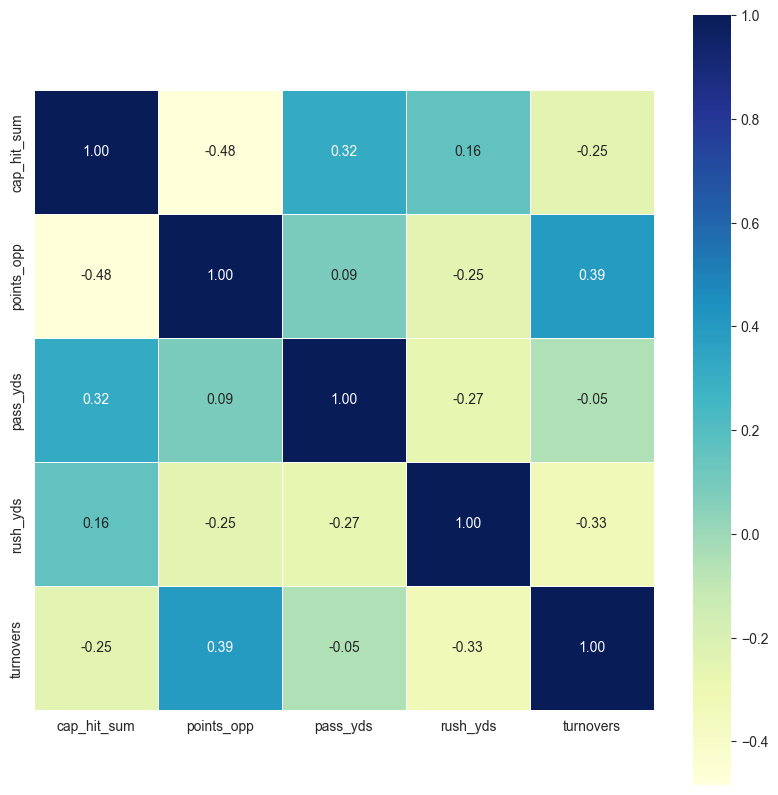

In [292]:
plt.figure(figsize=(10,10))

sns.heatmap(
    combined_corr_matrix,
    annot=True,
    cmap='YlGnBu',
    fmt=".2f",
    linewidths=0.5,
    square=True
)

In [293]:
#  Multiple linear regression with avg 2 year gini coefficient and sum of cap hit


# OLS Regression Results
# ==============================================================================
# Dep. Variable:          win_loss_perc   R-squared:                       0.758
# Model:                            OLS   Adj. R-squared:                  0.746
# Method:                 Least Squares   F-statistic:                     63.30
# Date:                Sat, 03 Jan 2026   Prob (F-statistic):           2.28e-51
# Time:                        18:00:24   Log-Likelihood:                 177.74
# No. Observations:                 192   AIC:                            -335.5
# Df Residuals:                     182   BIC:                            -302.9
# Df Model:                           9
# Covariance Type:            nonrobust
# =========================================================================================
#                             coef    std err          t      P>|t|      [0.025      0.975]
# -----------------------------------------------------------------------------------------
# const                     1.6594      1.210      1.372      0.172      -0.727       4.046
# avg_gini_coef_2_years    -0.1331      0.232     -0.575      0.566      -0.590       0.324
# cap_hit_sum               0.4011      0.075      5.369      0.000       0.254       0.548
# points_opp               -0.0014      0.000     -8.392      0.000      -0.002      -0.001
# pass_yds                  0.0003      0.000      1.445      0.150      -0.000       0.001
# rush_yds                  0.0004      0.000      1.628      0.105   -7.79e-05       0.001
# plays_offense            -0.0013      0.001     -1.093      0.276      -0.004       0.001
# yds_per_play_offense     -0.2167      0.224     -0.968      0.334      -0.658       0.225
# turnovers                -0.0080      0.001     -5.642      0.000      -0.011      -0.005
# penalties                -0.0004      0.000     -0.752      0.453      -0.001       0.001
# ==============================================================================
# Omnibus:                        1.893   Durbin-Watson:                   2.070
# Prob(Omnibus):                  0.388   Jarque-Bera (JB):                1.612
# Skew:                          -0.218   Prob(JB):                        0.447
# Kurtosis:                       3.103   Cond. No.                     7.54e+05
# ==============================================================================

# Removed penalties, then yards per play offense, then plays offense
# Tried adding penalty yards, but it was also a very insignificant variable
#   Teams that have more penalties are trying harder to make big plays/competing harder?


#
# OLS Regression Results
# ==============================================================================
# Dep. Variable:          win_loss_perc   R-squared:                       0.755
# Model:                            OLS   Adj. R-squared:                  0.747
# Method:                 Least Squares   F-statistic:                     95.20
# Date:                Sat, 03 Jan 2026   Prob (F-statistic):           6.97e-54
# Time:                        18:06:18   Log-Likelihood:                 176.75
# No. Observations:                 192   AIC:                            -339.5
# Df Residuals:                     185   BIC:                            -316.7
# Df Model:                           6
# Covariance Type:            nonrobust
# =================================================================================
#                     coef    std err          t      P>|t|      [0.025      0.975]
# ---------------------------------------------------------------------------------
# const             0.3761      0.186      2.027      0.044       0.010       0.742
# cap_hit_sum       0.4127      0.074      5.605      0.000       0.267       0.558
# points_opp       -0.0014      0.000     -8.782      0.000      -0.002      -0.001
# pass_yds          0.0001   1.82e-05      5.750      0.000    6.89e-05       0.000
# rush_yds          0.0002   2.62e-05      5.778      0.000    9.98e-05       0.000
# plays_offense    -0.0001      0.000     -0.756      0.451      -0.001       0.000
# turnovers        -0.0080      0.001     -5.693      0.000      -0.011      -0.005
# ==============================================================================
# Omnibus:                        1.656   Durbin-Watson:                   2.070
# Prob(Omnibus):                  0.437   Jarque-Bera (JB):                1.476
# Skew:                          -0.214   Prob(JB):                        0.478
# Kurtosis:                       3.030   Cond. No.                     1.15e+05
# ==============================================================================

# Best model (based on AIC and BIC) does not include gini coefficient, penalties variables, or plays_offense

# OLS Regression Results
# ==============================================================================
# Dep. Variable:          win_loss_perc   R-squared:                       0.755
# Model:                            OLS   Adj. R-squared:                  0.748
# Method:                 Least Squares   F-statistic:                     114.4
# Date:                Sat, 03 Jan 2026   Prob (F-statistic):           8.21e-55
# Time:                        18:08:26   Log-Likelihood:                 176.45
# No. Observations:                 192   AIC:                            -340.9
# Df Residuals:                     186   BIC:                            -321.4
# Df Model:                           5
# Covariance Type:            nonrobust
# ===============================================================================
#                   coef    std err          t      P>|t|      [0.025      0.975]
# -------------------------------------------------------------------------------
# const           0.2633      0.110      2.388      0.018       0.046       0.481
# cap_hit_sum     0.4171      0.073      5.690      0.000       0.273       0.562
# points_opp     -0.0014      0.000     -8.817      0.000      -0.002      -0.001
# pass_yds     9.737e-05   1.53e-05      6.368      0.000    6.72e-05       0.000
# rush_yds        0.0001   2.49e-05      5.841      0.000    9.63e-05       0.000
# turnovers      -0.0083      0.001     -6.132      0.000      -0.011      -0.006
# ==============================================================================
# Omnibus:                        1.743   Durbin-Watson:                   2.093
# Prob(Omnibus):                  0.418   Jarque-Bera (JB):                1.550
# Skew:                          -0.219   Prob(JB):                        0.461
# Kurtosis:                       3.038   Cond. No.                     7.00e+04
# ==============================================================================




x = sm.add_constant(df_nfl_combined_modeling_vars)

mult_model = sm.OLS(wlp2,x).fit()
print(mult_model.summary())

                            OLS Regression Results                            
Dep. Variable:          win_loss_perc   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     114.4
Date:                Sat, 03 Jan 2026   Prob (F-statistic):           8.21e-55
Time:                        18:08:26   Log-Likelihood:                 176.45
No. Observations:                 192   AIC:                            -340.9
Df Residuals:                     186   BIC:                            -321.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2633      0.110      2.388      

In [294]:
fitted_values.shape

(192,)

In [295]:
wlp2_1d = wlp2['win_loss_perc'].to_numpy()
wlp2_1d.shape


(192,)

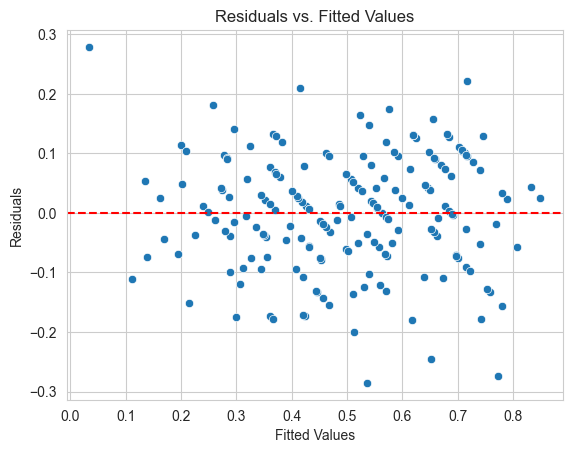

In [296]:
# Extract residuals and fitted values
residuals = mult_model.resid
fitted_values = mult_model.fittedvalues

# Create the plot
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()



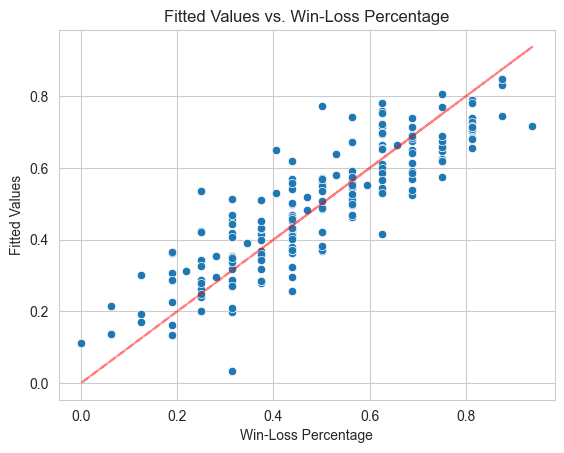

In [297]:
# Create the plot
sns.scatterplot(x=wlp2_1d, y=fitted_values)
plt.plot(wlp2_1d,wlp2_1d, color='red',linestyle='--',alpha=0.5)
plt.title("Fitted Values vs. Win-Loss Percentage")
plt.xlabel("Win-Loss Percentage")
plt.ylabel("Fitted Values")
plt.show()


In [ ]:



Model predicts more wins at low end, and fewer wins at high end

Can create polynomial regression and check results












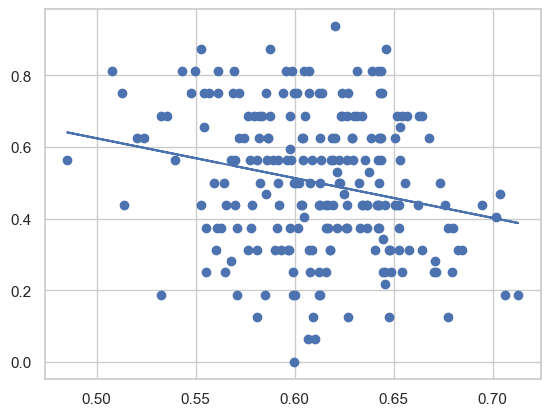

In [111]:
from scipy import stats

slope, intercept, r, p, std_err = stats.linregress(chgc, wlp)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, df_nfl_combined_2014_2020['cap_hit_gini_coef']))

plt.scatter(chgc, wlp)
plt.plot(chgc, mymodel)
plt.show()


C:\Users\efrui\PyCharmMiscProject\.venv\Lib\site-packages\pandas\core\internals\blocks.py:395: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


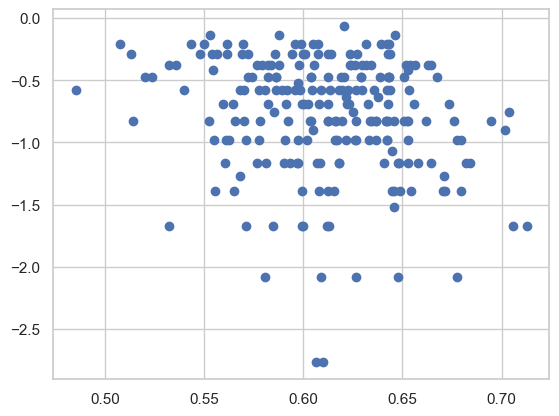

In [113]:
plt.scatter(chgc, np.log(wlp))


In [192]:
# correct result = 0.226

x=np.array([50,50,70,70,70,90,150,150,150,150])

gini_calculation(x)

np.float64(0.226)

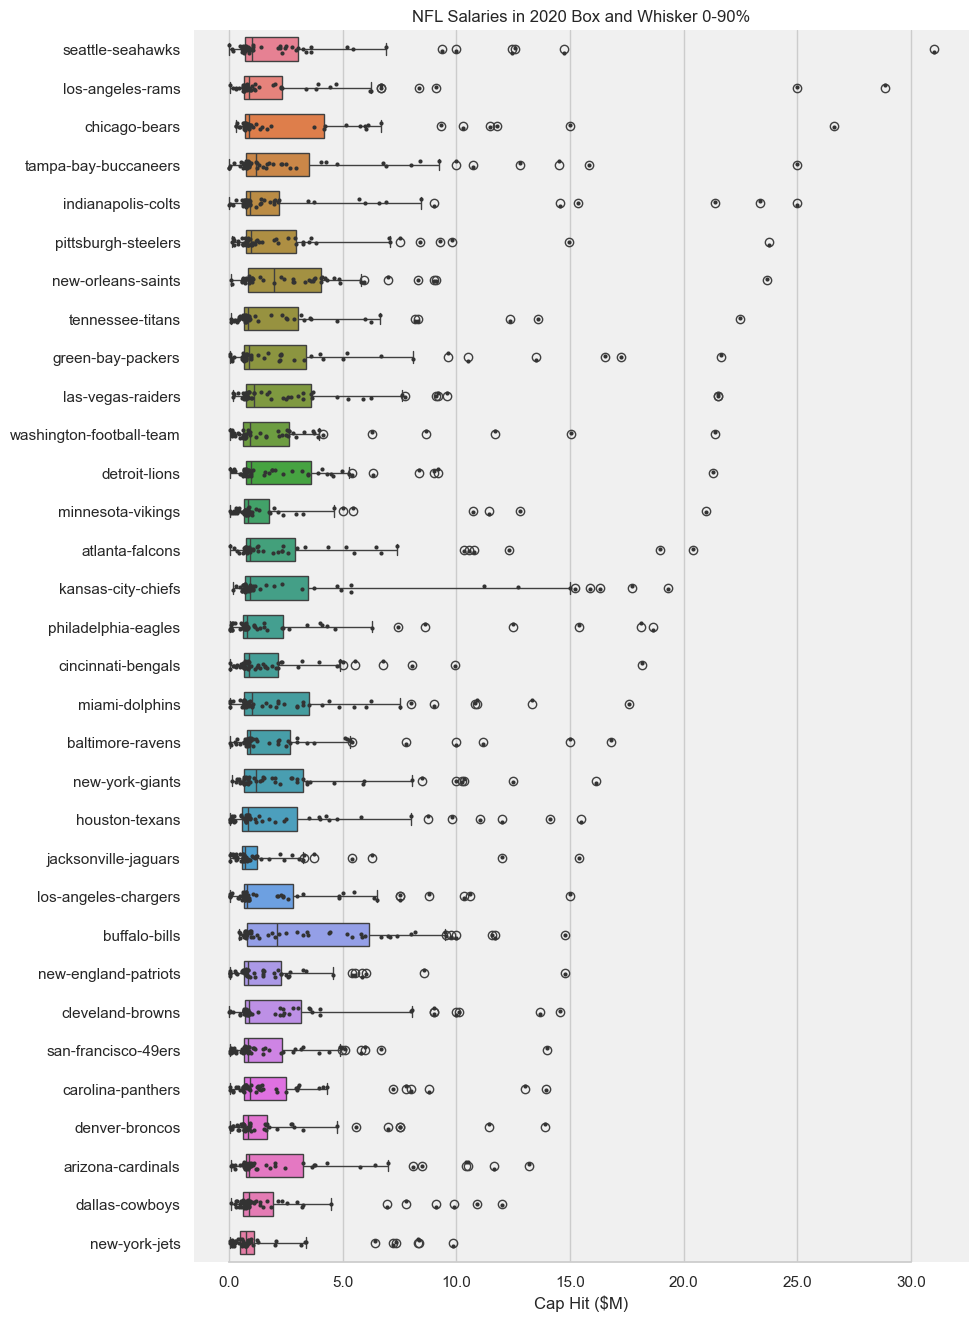

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 16))
# ax.set_xscale("log")
ax.set_facecolor('#f0f0f0')


# Load the example planets dataset
# salaries = sns.load_dataset("")

# Plot the orbital period with horizontal boxes
sns.boxplot(
    df_nfl_salaries[df_nfl_salaries['season']==2020], x="cap_hit", y="team", hue="team",
    whis=[0, 90], width=.6
    # , palette="vlag"
)

# Add in points to show each observation
sns.stripplot(df_nfl_salaries[df_nfl_salaries['season']==2020], x="cap_hit", y="team", size=3, color=".2")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="Cap Hit ($M)")
ax.set_xticks(ticks=np.linspace(0,30000000,7),labels=np.linspace(0,30,7))
ax.set_title("NFL Salaries in 2020 Box and Whisker 0-90%")
sns.despine()
sns.despine(trim=True, left=True)

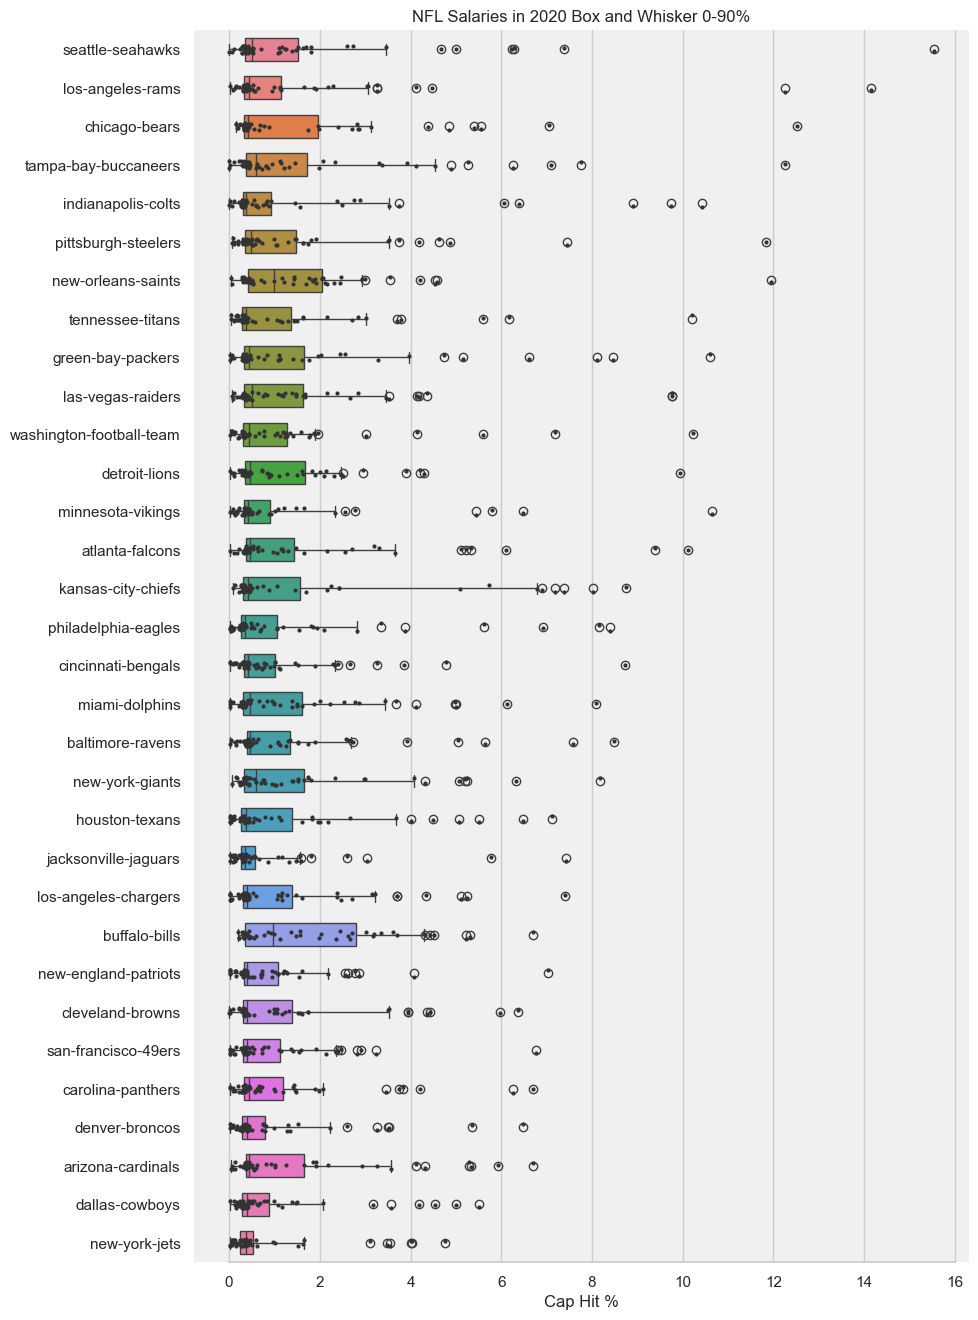

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 16))
# ax.set_xscale("log")
ax.set_facecolor('#f0f0f0')


# Load the example planets dataset
# salaries = sns.load_dataset("")

# Plot the orbital period with horizontal boxes
sns.boxplot(
    df_nfl_salaries[df_nfl_salaries['season']==2020], x="cap_percent", y="team", hue="team",
    whis=[0, 90], width=.6
    # , palette="vlag"
)

# Add in points to show each observation
sns.stripplot(df_nfl_salaries[df_nfl_salaries['season']==2020], x="cap_percent", y="team", size=3, color=".2")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="Cap Hit %")
# ax.set_xticks(ticks=np.linspace(0,30000000,7),labels=np.linspace(0,30,7))
ax.set_title("NFL Salaries in 2020 Box and Whisker 0-90%")
sns.despine()
sns.despine(trim=True, left=True)

Text(0.5, 1.0, 'NFL Salaries 2014-2020 Box and Whisker 0-100%')

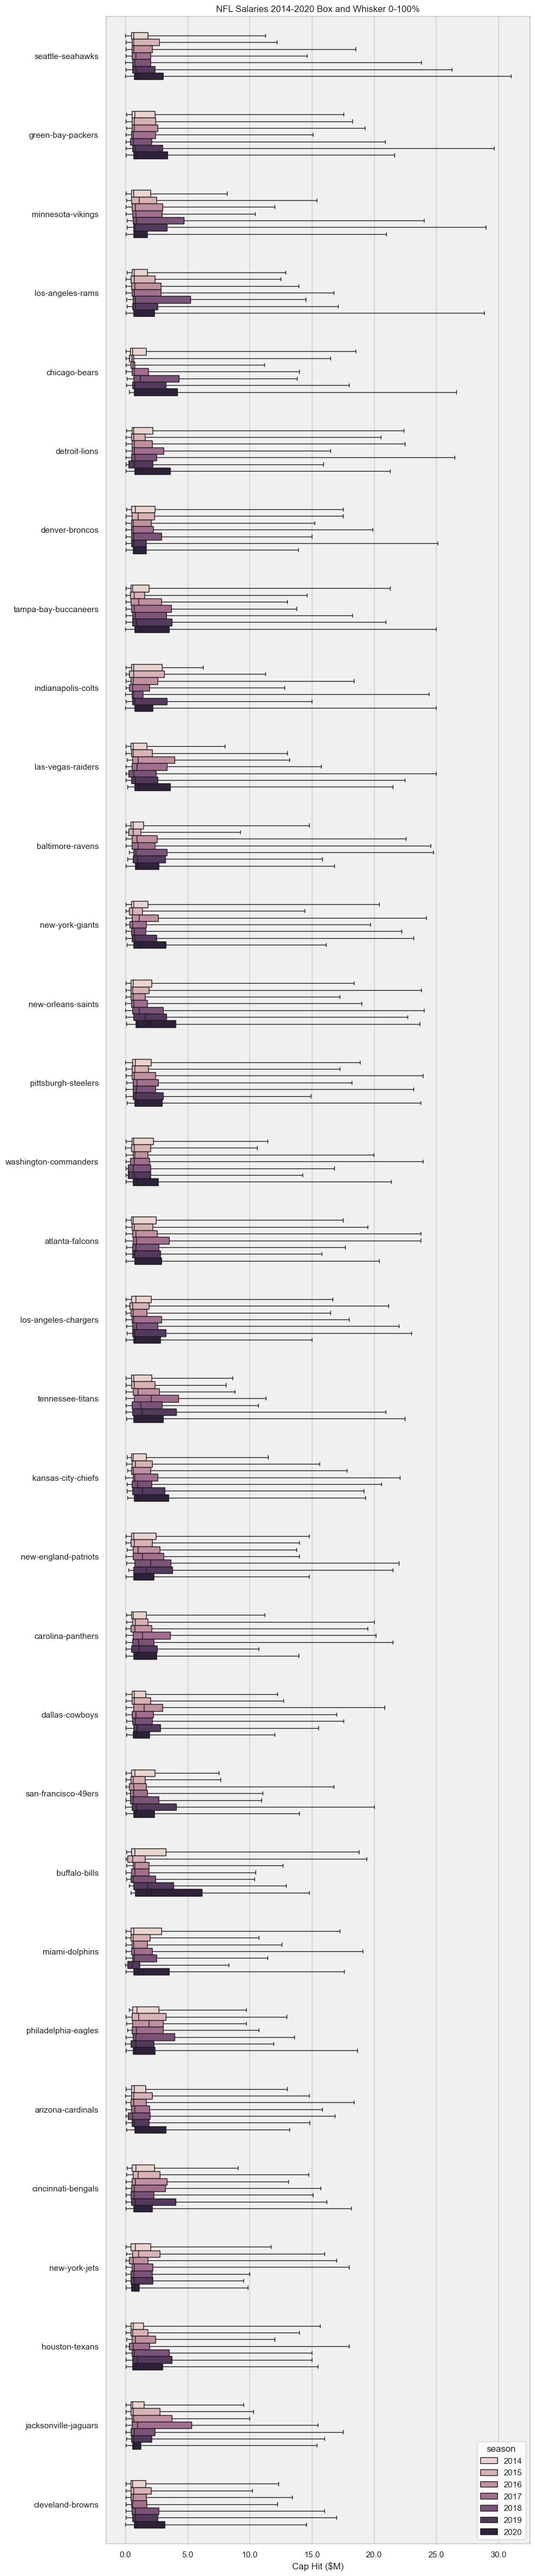

In [300]:

sns.set_theme(style="ticks")
sns.set_style("whitegrid")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(10, 60))
# ax.set_xscale("log")
ax.set_facecolor('#f0f0f0')


# Load the example planets dataset
# salaries = sns.load_dataset("")

# Plot the orbital period with horizontal boxes
sns.boxplot(
    df_nfl_salaries, x="cap_hit", y="team", hue="season",
    whis=[0, 100], width=.6
    # , palette="vlag"
)

# Add in points to show each observation
# sns.stripplot(df_nfl_salaries, x="cap_hit", y="team", size=3, color=".2")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set(xlabel="Cap Hit ($M)")
ax.set_xticks(ticks=np.linspace(0,30000000,7),labels=np.linspace(0,30,7))
ax.set_title("NFL Salaries 2014-2020 Box and Whisker 0-100%")
# sns.despine()
# sns.despine(trim=True, left=True)

In [ ]:
add data for average gini coefficient from previous 2 season and previous 2 seasons + current season

add total cap hit
add max salary
add mean salary
add median salary
replace redundant team names with latest team name

compare gini coefficients with box and whisker plots

create linear regression with other variables from team stats data set



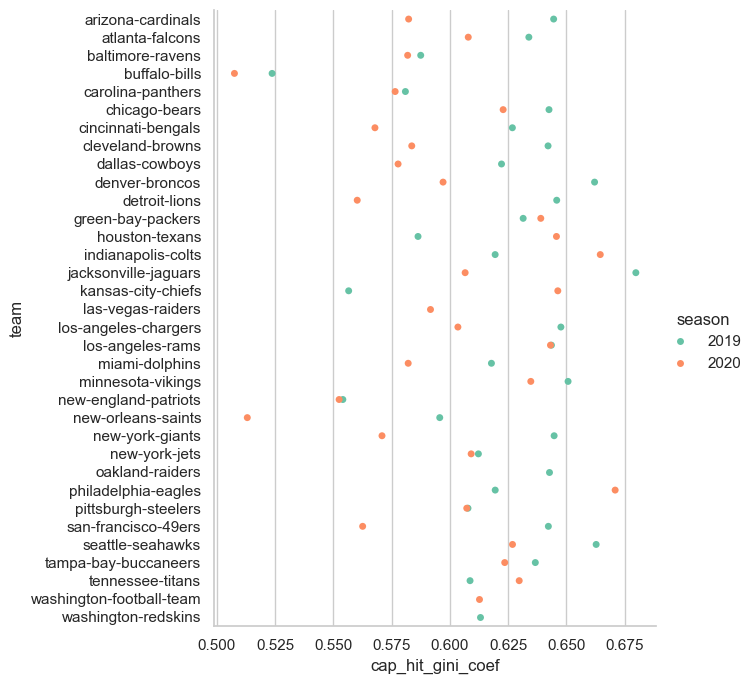

In [67]:

# plt.plot(figsize=(10,10))

# sns.color_palette("tab10")
sns.catplot(data=df_gini_team[df_gini_team['season']>2018], y="team", x="cap_hit_gini_coef", hue="season",jitter=False,height=7,palette="Set2")

#
# # Initialize the figure with a logarithmic x axis
# f, ax = plt.subplots(figsize=(10, 16))
# # ax.set_xscale("log")
# ax.set_facecolor('#f0f0f0')
#
#
# # Load the example planets dataset
# # salaries = sns.load_dataset("")
#
# # Plot the orbital period with horizontal boxes
# sns.barplot(
#     df_nfl_salaries[df_nfl_salaries['season']==2020], x="cap_hit", y="team", hue="team",
#     whis=[0, 90], width=.6
#     # , palette="vlag"
# )
#
# # Add in points to show each observation
# sns.stripplot(df_nfl_salaries[df_nfl_salaries['season']==2020], x="cap_hit", y="team", size=3, color=".2")
#
# # Tweak the visual presentation
# ax.xaxis.grid(True)
# ax.set(ylabel="")
# ax.set(xlabel="Cap Hit ($M)")
# ax.set_xticks(ticks=np.linspace(0,30000000,7),labels=np.linspace(0,30,7))
# ax.set_title("NFL Salaries in 2020 Box and Whisker 0-90%")
# sns.despine()
# sns.despine(trim=True, left=True)